<a href="https://colab.research.google.com/github/nithyajv/Face-mask-detection-and-person-identification/blob/master/Face_mask_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data preprocessing

In [ ]:
import os
# directory path for dataset
os.chdir("/content/drive/MyDrive/Face mask")
Dataset='Dataset'
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['UnMasked', 'Masked']


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
img_rows, img_cols = 112, 112


In [ ]:
images = []
labels = []

for category in Data_Dir:
    folder_path = os.path.join(Dataset, category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        img=cv2.imread(img_path)

        try:
            #to gray scale
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            resized_img=cv2.resize(grayscale_img,(img_rows, img_cols))
            images.append(resized_img)
            labels.append(category)
        except Exception as e:
            print('Exception:',e)

images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows, img_cols,1))
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)
(train_x, test_x, train_y, test_y) = train_test_split(images, labels, test_size=0.25, random_state=0)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
num_classes = 2
batch_size = 32

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 64)      640       
                                                                 
 activation (Activation)     (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 53, 53, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 128)      0         
 2D)                                                    

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


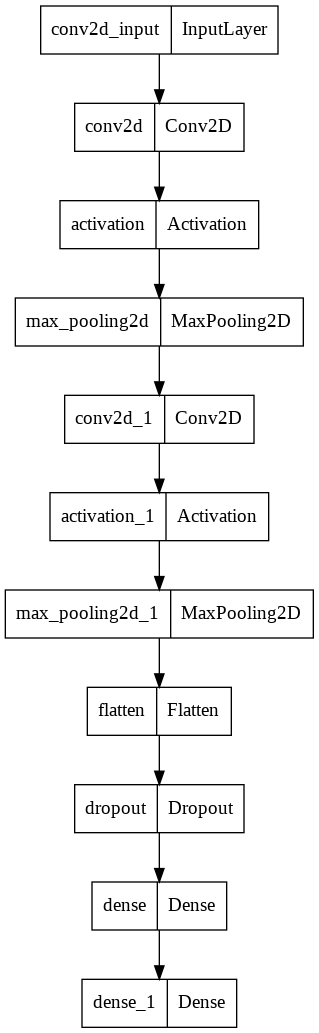

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='face_mask_detection_architecture.png')

In [ ]:
from tensorflow import keras
from keras import optimizers
from keras.models import Model
from tensorflow.keras.optimizers import Adam 
epochs = 50
model.compile(
optimizer= keras.optimizers.Adam(lr=0.001), 
loss= 'CategoricalCrossentropy', metrics=['accuracy']
      ) 


fitted_model = model.fit(
    train_x,
    train_y,
    epochs = epochs,
    validation_split=0.25)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
224/224 [==============================] - 277s 1s/step - loss: 0.3511 - accuracy: 0.8423 - val_loss: 0.2183 - val_accuracy: 0.9237
Epoch 2/50
224/224 [==============================] - 262s 1s/step - loss: 0.1799 - accuracy: 0.9303 - val_loss: 0.1665 - val_accuracy: 0.9401
Epoch 3/50
224/224 [==============================] - 260s 1s/step - loss: 0.1005 - accuracy: 0.9624 - val_loss: 0.1547 - val_accuracy: 0.9363
Epoch 4/50
224/224 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9756

KeyboardInterrupt: ignored

In [ ]:
from matplotlib import pyplot as plt 
plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss value')
plt.legend()
plt.show()

plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],'r',label='validation_accuracy')
plt.ylabel('loss value')
plt.legend()
plt.show()

In [ ]:
model.save('face_mask_detection_alert_system.h5')